<a href="https://colab.research.google.com/github/priyanka-261296/-COVID-19-Impact-on-Digital-Learningnin/blob/main/COVID_19_Impact_on_Digital_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***COVID-19'S IMPACT ON DIGITAL LEARNING***

***OVERVIEW***

The COVID-19 Pandemic has disrupted learning for more than 56 million students in the United States. In the Spring of 2020, most states and local governments across the U.S. closed educational institutions to stop the spread of the virus. In response, schools and teachers have attempted to reach students remotely through distance learning tools and digital platforms. Until today, concerns of the exacaberting digital divide and long-term learning loss among America’s most vulnerable learners continue to grow.

I intend to analyse 3 different datasets product_info , districts_info and engagement_data in that order and find insighst

***OBJECTIVE***
***to explore:***

(1) the state of digital learning in 2020

(2) how the engagement of digital learning relates to factors such as district demographics, broadband access, and state/national level policies and events.

In [5]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import glob
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline

In [6]:
product_df = pd.read_csv('/content/products_info.csv')

In [7]:
product_df.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [8]:
product_df.describe()

,LP ID
count,372.000000
mean,54565.795699
std,26247.551437
min,10533.000000
25%,30451.000000
50%,53942.500000
75%,77497.000000
max,99916.000000


In [9]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LP ID                       372 non-null    int64 
 1   URL                         372 non-null    object
 2   Product Name                372 non-null    object
 3   Provider/Company Name       371 non-null    object
 4   Sector(s)                   352 non-null    object
 5   Primary Essential Function  352 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.6+ KB


In [10]:
#dropping null objects
product_df.dropna(inplace=True)

# ***Exploratory Data Analysis***

Let us find out which sector(s) do most companies deal with Sectors







In [11]:
pie=product_df.groupby('Sector(s)').count()[['LP ID']]
pie['percent'] = (pie['LP ID']/pie['LP ID'].sum() *100)
x=list(pie['percent'])
y=[]
for i in x:
    y.append(str(i))
pie

,LP ID,percent
Sector(s),,
Corporate,1,0.284091
Higher Ed; Corporate,1,0.284091
PreK-12,170,48.295455
PreK-12; Higher Ed,65,18.465909
PreK-12; Higher Ed; Corporate,115,32.670455


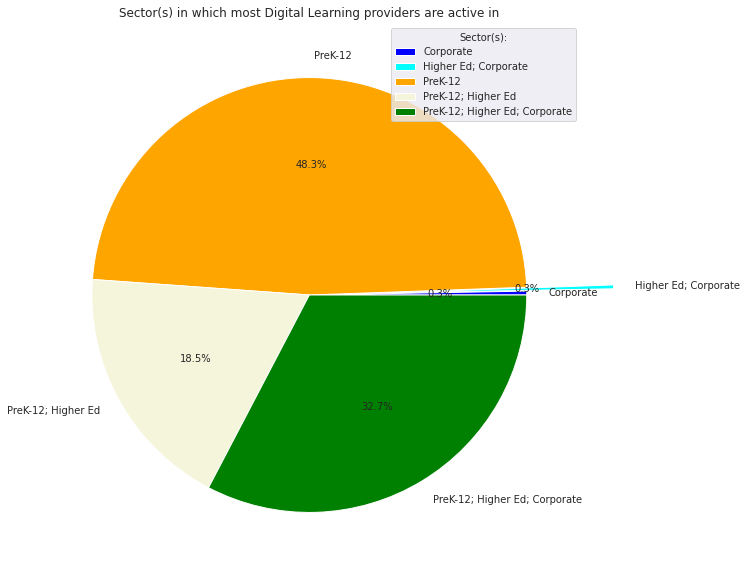

In [12]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,10))

plt.pie(pie['LP ID'],labels=pie.index,explode=[0,0.4,0,0,0],colors = ("blue","cyan","orange","beige","green"),autopct='%1.1f%%')
         
plt.title("Sector(s) in which most Digital Learning providers are active in")
plt.legend(title="Sector(s):")

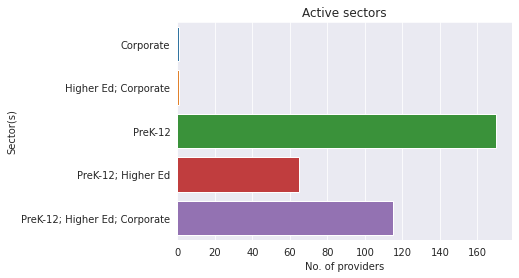

In [13]:
plt.figure()
plt.title("Active sectors")
plt.ylabel('Sector(s)')
plt.xlabel('No. of providers')
sns.barplot(x=list(pie['LP ID']),y=pie.index)

In [14]:
product_df[product_df['Sector(s)']=='Higher Ed; Corporate']['Product Name'],product_df[product_df['Sector(s)']=='Corporate']['Product Name']

(185    Qualtrics
 Name: Product Name, dtype: object, 138    Weebly
 Name: Product Name, dtype: object)

# ***Except for two providers all the other providers are concerned about PreK-12***

**Qualtrics : Deals with Higher Ed & Corporates**

**Weebly : Deals only with Corporates**

# ***Primary Essential Function : The main objective of the company/provider***

***We first need to understand the following key words.***

**LC :**  **Learning & Curriculum **

**CM :** ** Classroom Management & others **

**SDO =** **School & District Operations **

In [15]:
def pef1(data):
    return data.split('-')[0]
def pef2(data):
     return data.split('-')[0]+'-'+data.split('-')[1]
product_df1 = product_df.sort_values(by='Primary Essential Function',axis=0)
product_df1['PEF-1']=product_df['Primary Essential Function'].apply(pef1)
product_df1['PEF-2']=product_df['Primary Essential Function'].apply(pef2)

In [16]:
pef=product_df1.groupby('Primary Essential Function',sort=False).count()[['LP ID']]
pef['percent'] = (pef['LP ID']/pef['LP ID'].sum() *100)

In [17]:
pef.head()

,LP ID,percent
Primary Essential Function,,
CM - Classroom Engagement & Instruction - Assessment & Classroom Response,4,1.136364
CM - Classroom Engagement & Instruction - Classroom Management,11,3.125000
CM - Classroom Engagement & Instruction - Communication & Messaging,5,1.420455
CM - Teacher Resources - Grading & Attendance,1,0.284091
CM - Teacher Resources - Lesson Planning,3,0.852273


In [18]:
def pef1(data):
    return data.split('-')[0]
def pef2(data):
     return data.split('-')[0]+'-'+data.split('-')[1]
product_df1 = product_df.sort_values(by='Primary Essential Function',axis=0)
product_df1['PEF-1']=product_df['Primary Essential Function'].apply(pef1)
product_df1['PEF-2']=product_df['Primary Essential Function'].apply(pef2)

In [19]:
product_df1.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,PEF-1,PEF-2
51,33185,http://www.google.com/forms/about/,Google Forms,Google LLC,PreK-12; Higher Ed; Corporate,CM - Classroom Engagement & Instruction - Asse...,CM,CM - Classroom Engagement & Instruction
302,50626,https://forms.office.com/,Microsoft Forms,Microsoft Education,PreK-12; Higher Ed; Corporate,CM - Classroom Engagement & Instruction - Asse...,CM,CM - Classroom Engagement & Instruction
159,26696,https://www.surveymonkey.com/,SurveyMonkey,SurveyMonkey,PreK-12; Higher Ed; Corporate,CM - Classroom Engagement & Instruction - Asse...,CM,CM - Classroom Engagement & Instruction
260,69706,http://www.performancematters.com/,PoweSchool Performance Matters,Performance Matters,PreK-12,CM - Classroom Engagement & Instruction - Asse...,CM,CM - Classroom Engagement & Instruction
316,32032,https://www.signupgenius.com/,SignUpGenius,SignUpGenius,PreK-12; Higher Ed; Corporate,CM - Classroom Engagement & Instruction - Clas...,CM,CM - Classroom Engagement & Instruction


In [20]:
pef1=product_df1.groupby('PEF-1',sort=False).count()[['LP ID']]
pef1['percent'] = (pef1['LP ID']/pef1['LP ID'].sum() *100)

In [21]:
pef1

,LP ID,percent
PEF-1,,
CM,34,9.659091
LC,272,77.272727
LC/CM/SDO,16,4.545455
SDO,30,8.522727


In [22]:
pef2=product_df1.groupby('PEF-2',sort=False).count()[['LP ID']]
pef2['percent'] = (pef2['LP ID']/pef2['LP ID'].sum() *100)

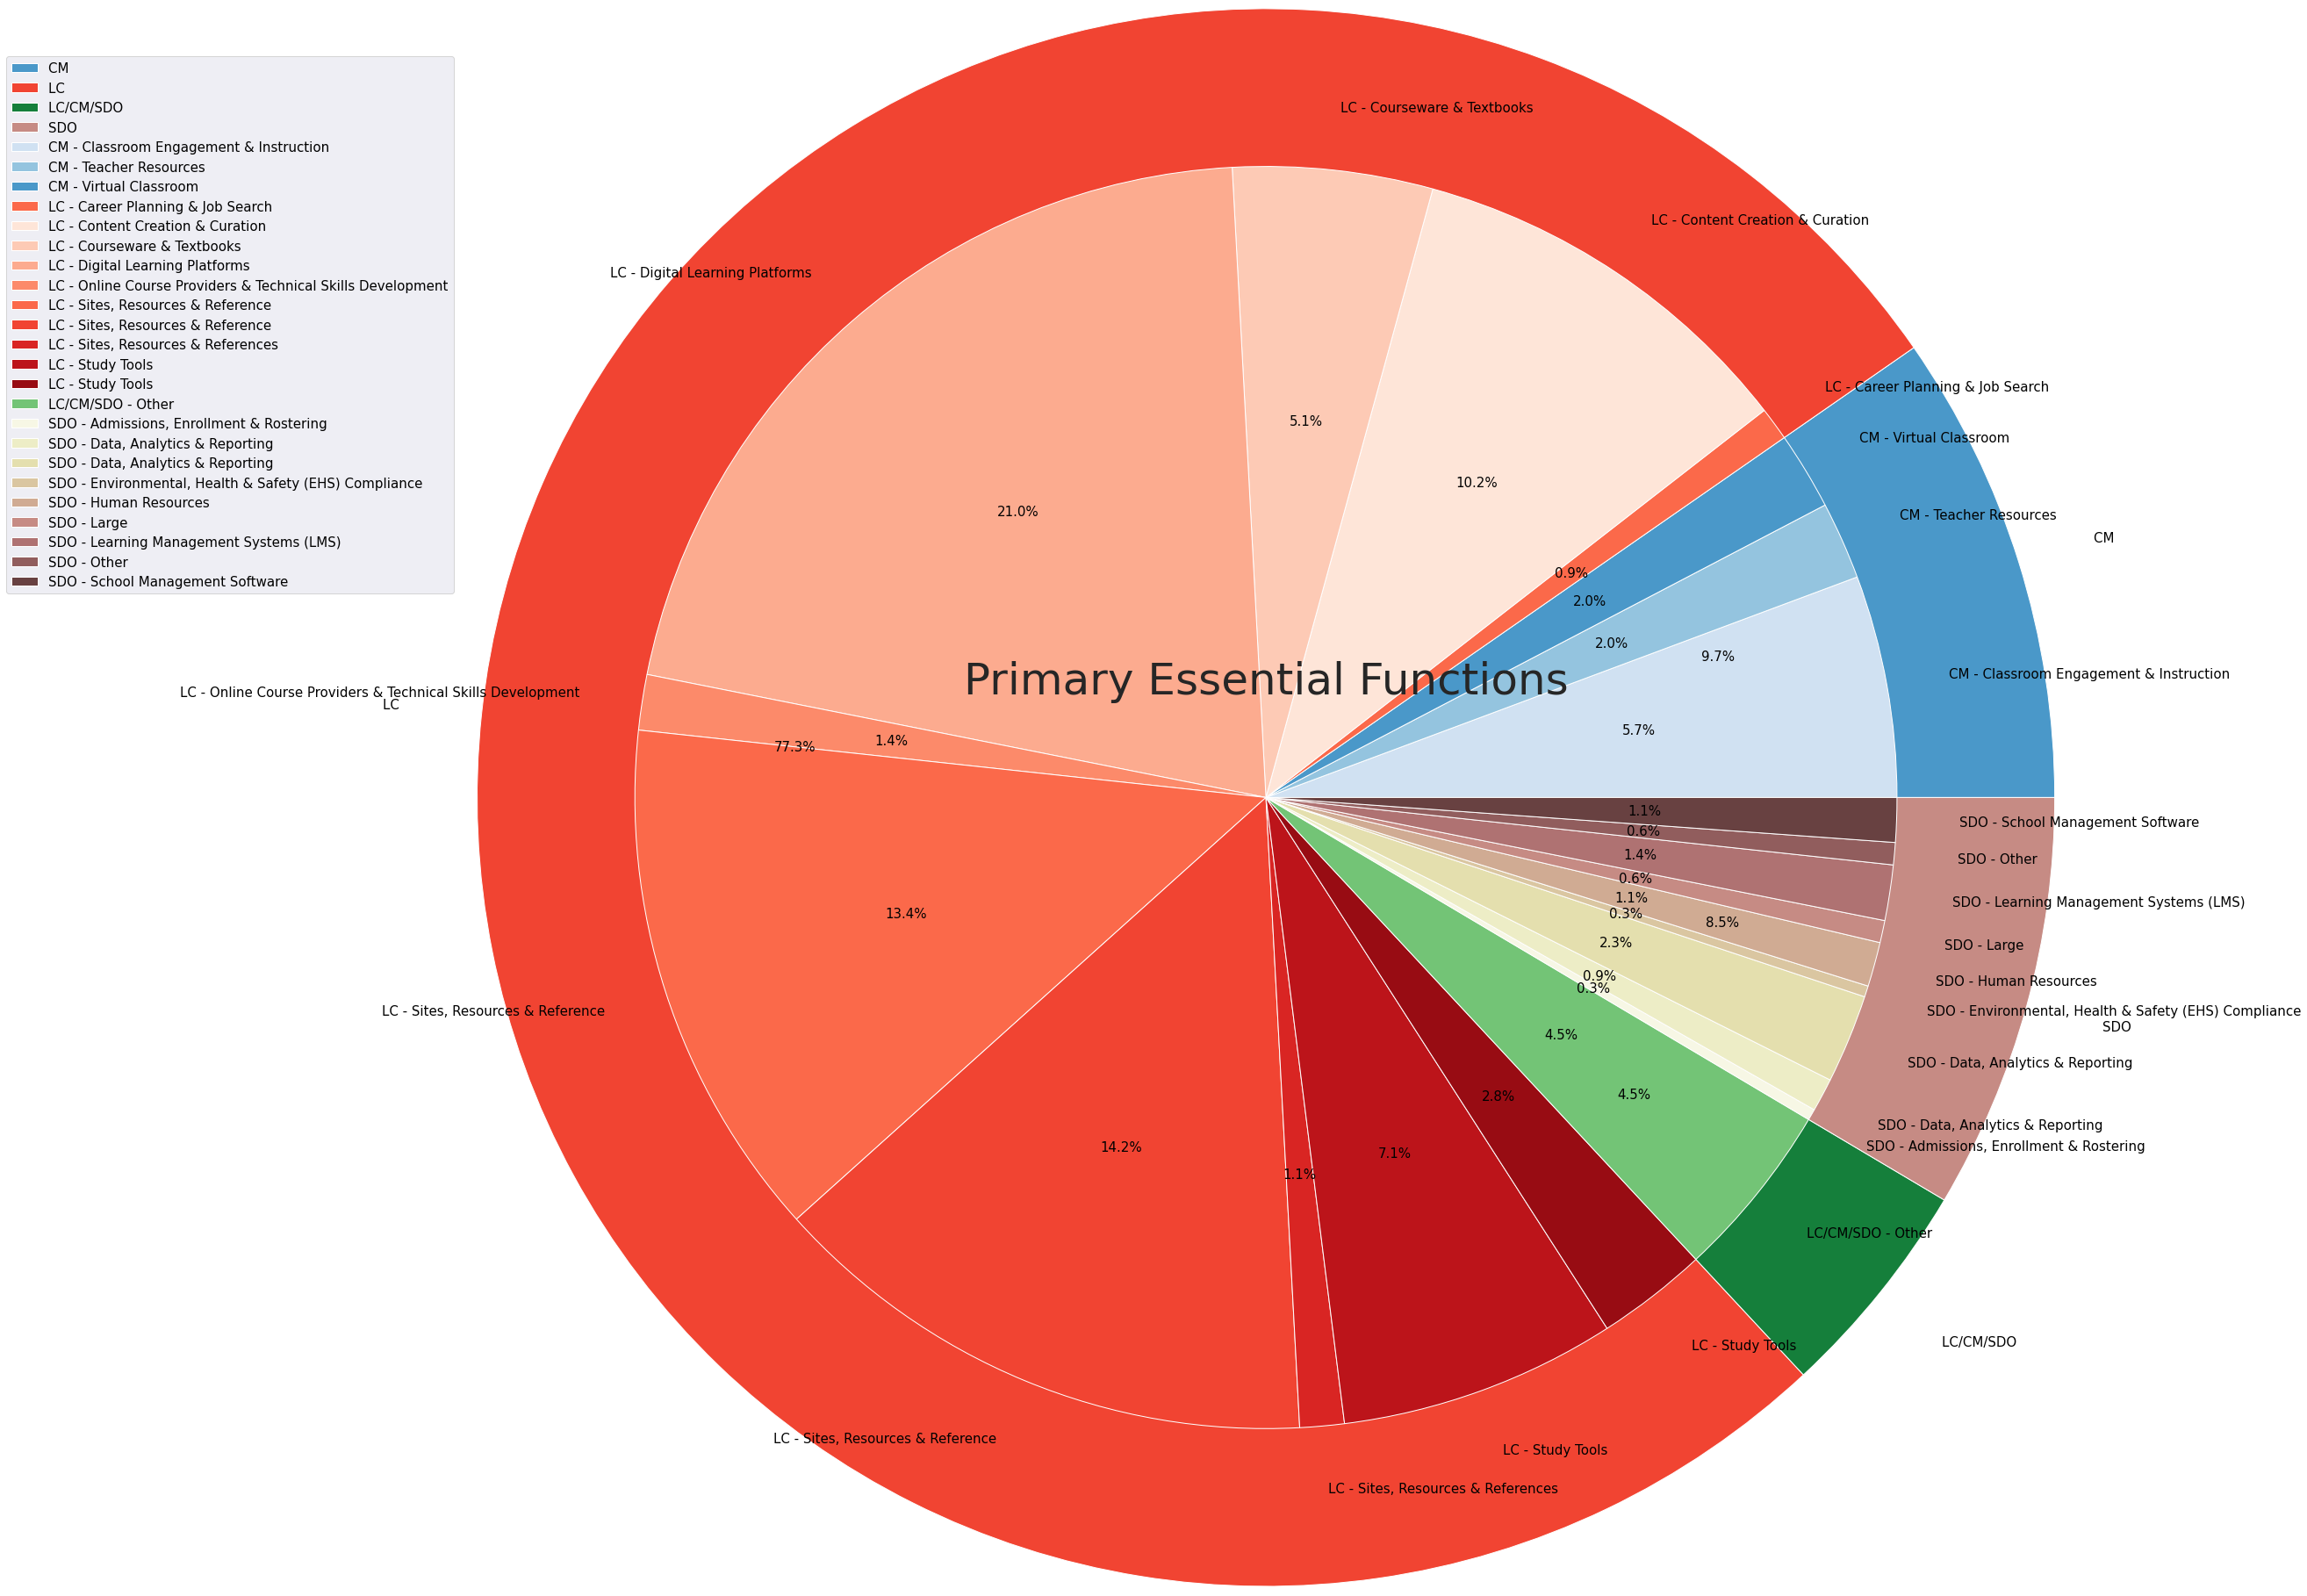

In [23]:
sns.set_style('darkgrid')
fig,ax = plt.subplots()
ax.axis('equal')

plt.rcParams.update({'text.color' : "black",
                     'axes.labelcolor' : "black"})
plt.rcParams.update({'font.size': 15})

cm, lc, other, sdo=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.pink_r]

ax.pie(pef1['LP ID'],labels=pef1.index,colors=[cm(0.6) , lc(0.6) , other(0.8) , sdo(0.6)],autopct='%1.1f%%', radius=10,explode=[0,0,0,0])
ax.pie(pef2['LP ID'],labels=pef2.index,colors=[cm(0.2),cm(0.4),cm(0.6),lc(0.5),lc(0.1),lc(0.2),lc(0.3),lc(0.4),lc(0.5),lc(0.6),lc(0.7),lc(0.8),lc(0.9),other(0.5),sdo(0.1),sdo(0.2),sdo(0.3),sdo(0.4),sdo(0.5),sdo(0.6),sdo(0.7),sdo(0.8),sdo(0.9)], autopct='%1.1f%%', radius=8)
                  
plt.title("Primary Essential Functions",fontdict={'fontsize':50})
ax.legend(loc='lower right',bbox_to_anchor=(-2,1.5))
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)


# ***Understanding the pie chart above***
The pie chart above represents  PrimaryEssentialFunctions 
There is an inner pie and an outer pie. The outer pie has 4 major slices and the slices in the inner pie are the subslices of the of major slices with same colour group in the outer pie.

e.g. CM - Classroom Engagement & Instruction (shade of blue) CM - Teacher Resources (shade of blue) CM - Virtual Classroom (shade of blue) are the subslices of CM (in blue)

The outer pie is divided into 4 sections (IN COUNTERCLOCKWISE DIRECTION) representing:

CM in blue : 9.7% (with 3 subsections in the inner pie)
LC in red : 77.3% (with 10 subsections in the inner pie)
All in green : 4.5% (with 1 subsections in the inner pie)
SDO in brown : 8.5% (with 9 subsections in the inner pie)
It is very clear that 81.8% new companies offer primarily Learning and curriculum.

77.3 directly related to LC and 4.5 related to all

It is followed by Classroom management and School & district Operation

PS: Please zoom into the pie chart for better understanding

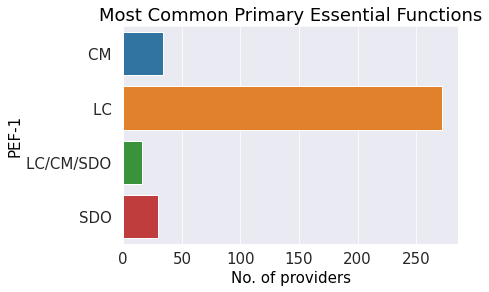

In [24]:
#Plotting a bar graph based on the pie chart above for better understanding
plt.figure()
plt.title("Most Common Primary Essential Functions")
plt.ylabel('Primary Essential Functions')
plt.xlabel('No. of providers')
sns.barplot(x=list(pef1['LP ID']),y=pef1.index)

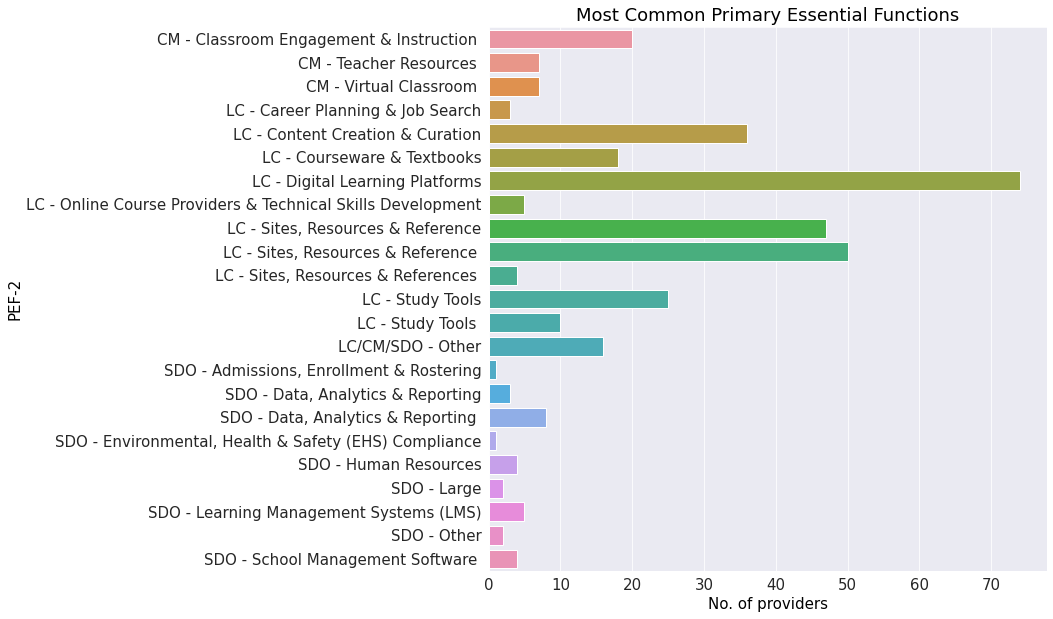

In [25]:

plt.figure(figsize=(10,10))
plt.title("Most Common Primary Essential Functions")
plt.ylabel('Primary Essential Functions')
plt.xlabel('No. of providers')
sns.barplot(x=list(pef2['LP ID']),y=pef2.index)

# ***Let's Analyse the companies that have more than one product***

In [26]:
more_than1 = product_df1.groupby('Provider/Company Name').count()[['Product Name','Primary Essential Function']]

In [27]:
more_than1 = more_than1[more_than1['Product Name']>1]

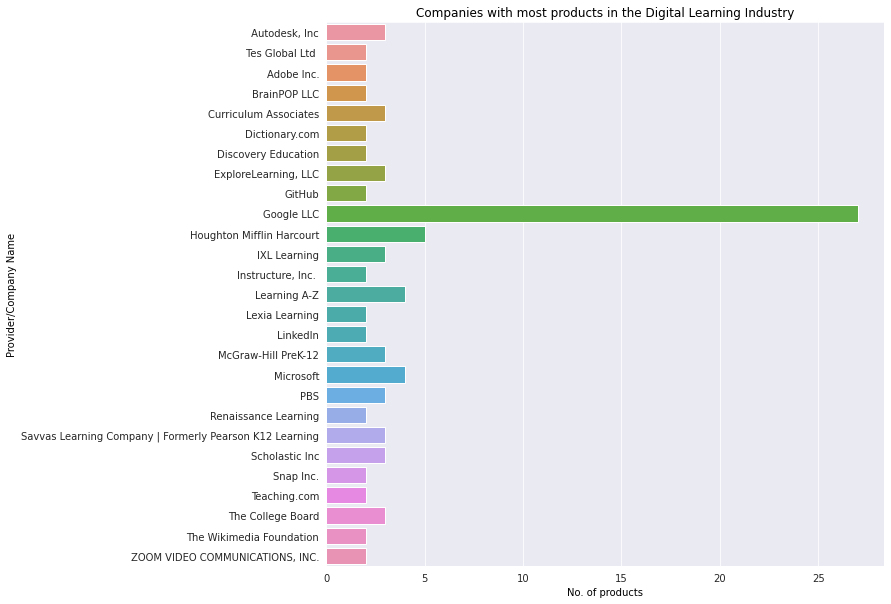

In [28]:
plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 10})
plt.title("Companies with most products in the Digital Learning Industry")
plt.ylabel('Companies')
plt.xlabel('No. of products')
sns.barplot(x=list(more_than1['Product Name']),y=more_than1.index)

(-0.5, 1439.5, 1079.5, -0.5)

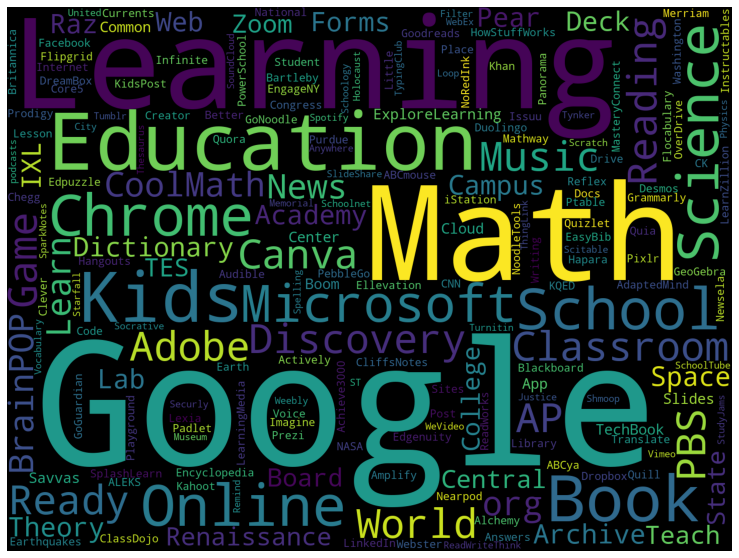

In [29]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(product_df['Product Name'].astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

(-0.5, 1439.5, 1079.5, -0.5)

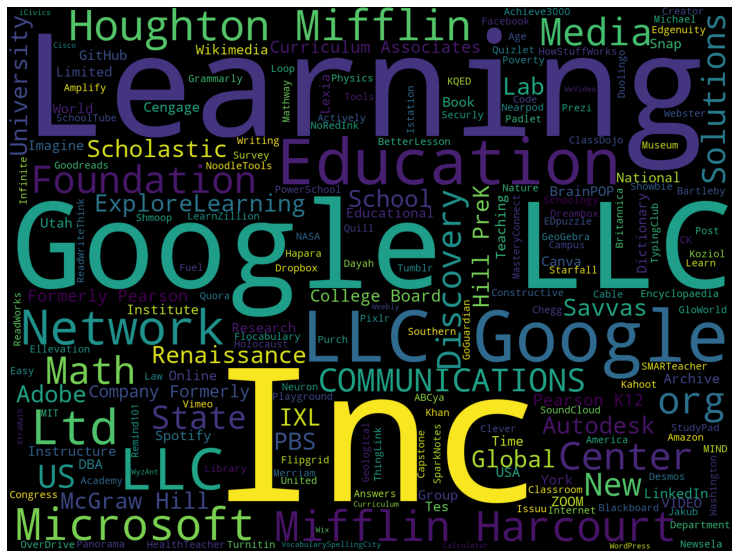

In [30]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(product_df['Provider/Company Name'].astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

Apart from words like Learning and Education , which may be common in the names of most Edtech companies, Google LLC is the biggest , most significant organization in this domain

While most companies have struggled to put forward 5 products , Google LLC has surprisingly put up  27  products, establishing itself head and shoulder above the rest.

It would be interesting to analyse the products of Google and their domains

**Google LLC Product Analysis**

In [31]:
google_df = product_df1[product_df1['Provider/Company Name']=='Google LLC']
google_df

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,PEF-1,PEF-2
51,33185,http://www.google.com/forms/about/,Google Forms,Google LLC,PreK-12; Higher Ed; Corporate,CM - Classroom Engagement & Instruction - Asse...,CM,CM - Classroom Engagement & Instruction
338,30008,https://groups.google.com/a/learnplatform.com/...,Google Groups,Google LLC,PreK-12; Higher Ed; Corporate,CM - Classroom Engagement & Instruction - Clas...,CM,CM - Classroom Engagement & Instruction
56,52448,http://plus.google.com/,Google Currents,Google LLC,PreK-12; Higher Ed; Corporate,CM - Classroom Engagement & Instruction - Comm...,CM,CM - Classroom Engagement & Instruction
55,21917,https://voice.google.com,Google Voice,Google LLC,PreK-12; Higher Ed; Corporate,CM - Classroom Engagement & Instruction - Comm...,CM,CM - Classroom Engagement & Instruction
52,48333,https://hangouts.google.com/,Google Hangouts,Google LLC,PreK-12; Higher Ed; Corporate,CM - Virtual Classroom - Video Conferencing & ...,CM,CM - Virtual Classroom
345,98845,https://meet.google.com/_meet,Meet,Google LLC,PreK-12; Higher Ed; Corporate,CM - Virtual Classroom - Video Conferencing & ...,CM,CM - Virtual Classroom
368,37805,http://google.com/slides/about/,Google Slides,Google LLC,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation,LC,LC - Content Creation & Curation
195,65797,https://chrome.google.com/webstore/detail/goog...,Google Drawings,Google LLC,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation,LC,LC - Content Creation & Curation
48,95731,http://docs.google.com/,Google Docs,Google LLC,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation,LC,LC - Content Creation & Curation
349,70878,https://musiclab.chromeexperiments.com/,CHROME MUSIC LAB,Google LLC,PreK-12; Higher Ed,LC - Content Creation & Curation,LC,LC - Content Creation & Curation


In [32]:
gpie=google_df.groupby('Sector(s)').count()[['LP ID']]
gpie['percent'] = (gpie['LP ID']/gpie['LP ID'].sum() *100)
x=list(gpie['percent'])
y=[]
for i in x:
    y.append(str(i))
gpie

,LP ID,percent
Sector(s),,
PreK-12,2,7.407407
PreK-12; Higher Ed,2,7.407407
PreK-12; Higher Ed; Corporate,23,85.185185


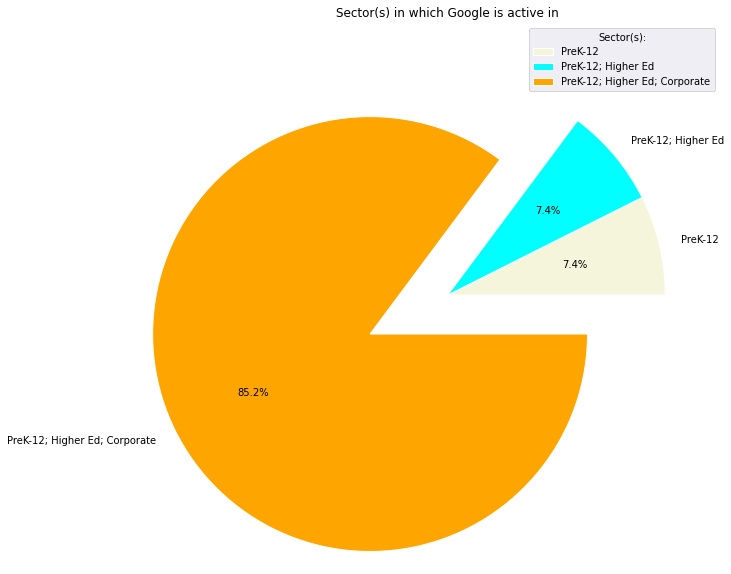

In [33]:
plt.figure(figsize=(10,10))

plt.pie(gpie['LP ID'],labels=gpie.index,explode=[0,0,0.4],colors = ("beige","cyan","orange","beige","green"),autopct='%1.1f%%')
         
plt.title("Sector(s) in which Google is active in")
plt.legend(title="Sector(s):")

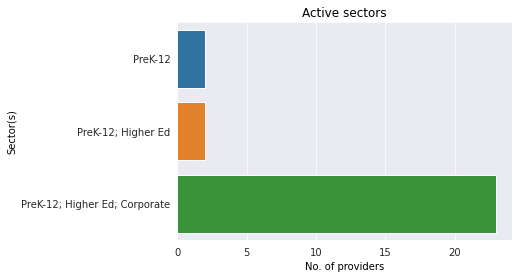

In [34]:
plt.figure()
plt.title("Active sectors")
plt.ylabel('Sector(s)')
plt.xlabel('No. of providers')
sns.barplot(x=list(gpie['LP ID']),y=gpie.index)

In [35]:
gpef1=google_df.groupby('PEF-1',sort=False).count()[['LP ID']]
gpef1['percent'] = (gpef1['LP ID']/gpef1['LP ID'].sum() *100)
gpef1

,LP ID,percent
PEF-1,,
CM,6,22.222222
LC,13,48.148148
LC/CM/SDO,6,22.222222
SDO,2,7.407407


In [36]:
gpef2=google_df.groupby('PEF-2',sort=False).count()[['LP ID']]
gpef2['percent'] = (gpef2['LP ID']/gpef2['LP ID'].sum() *100)

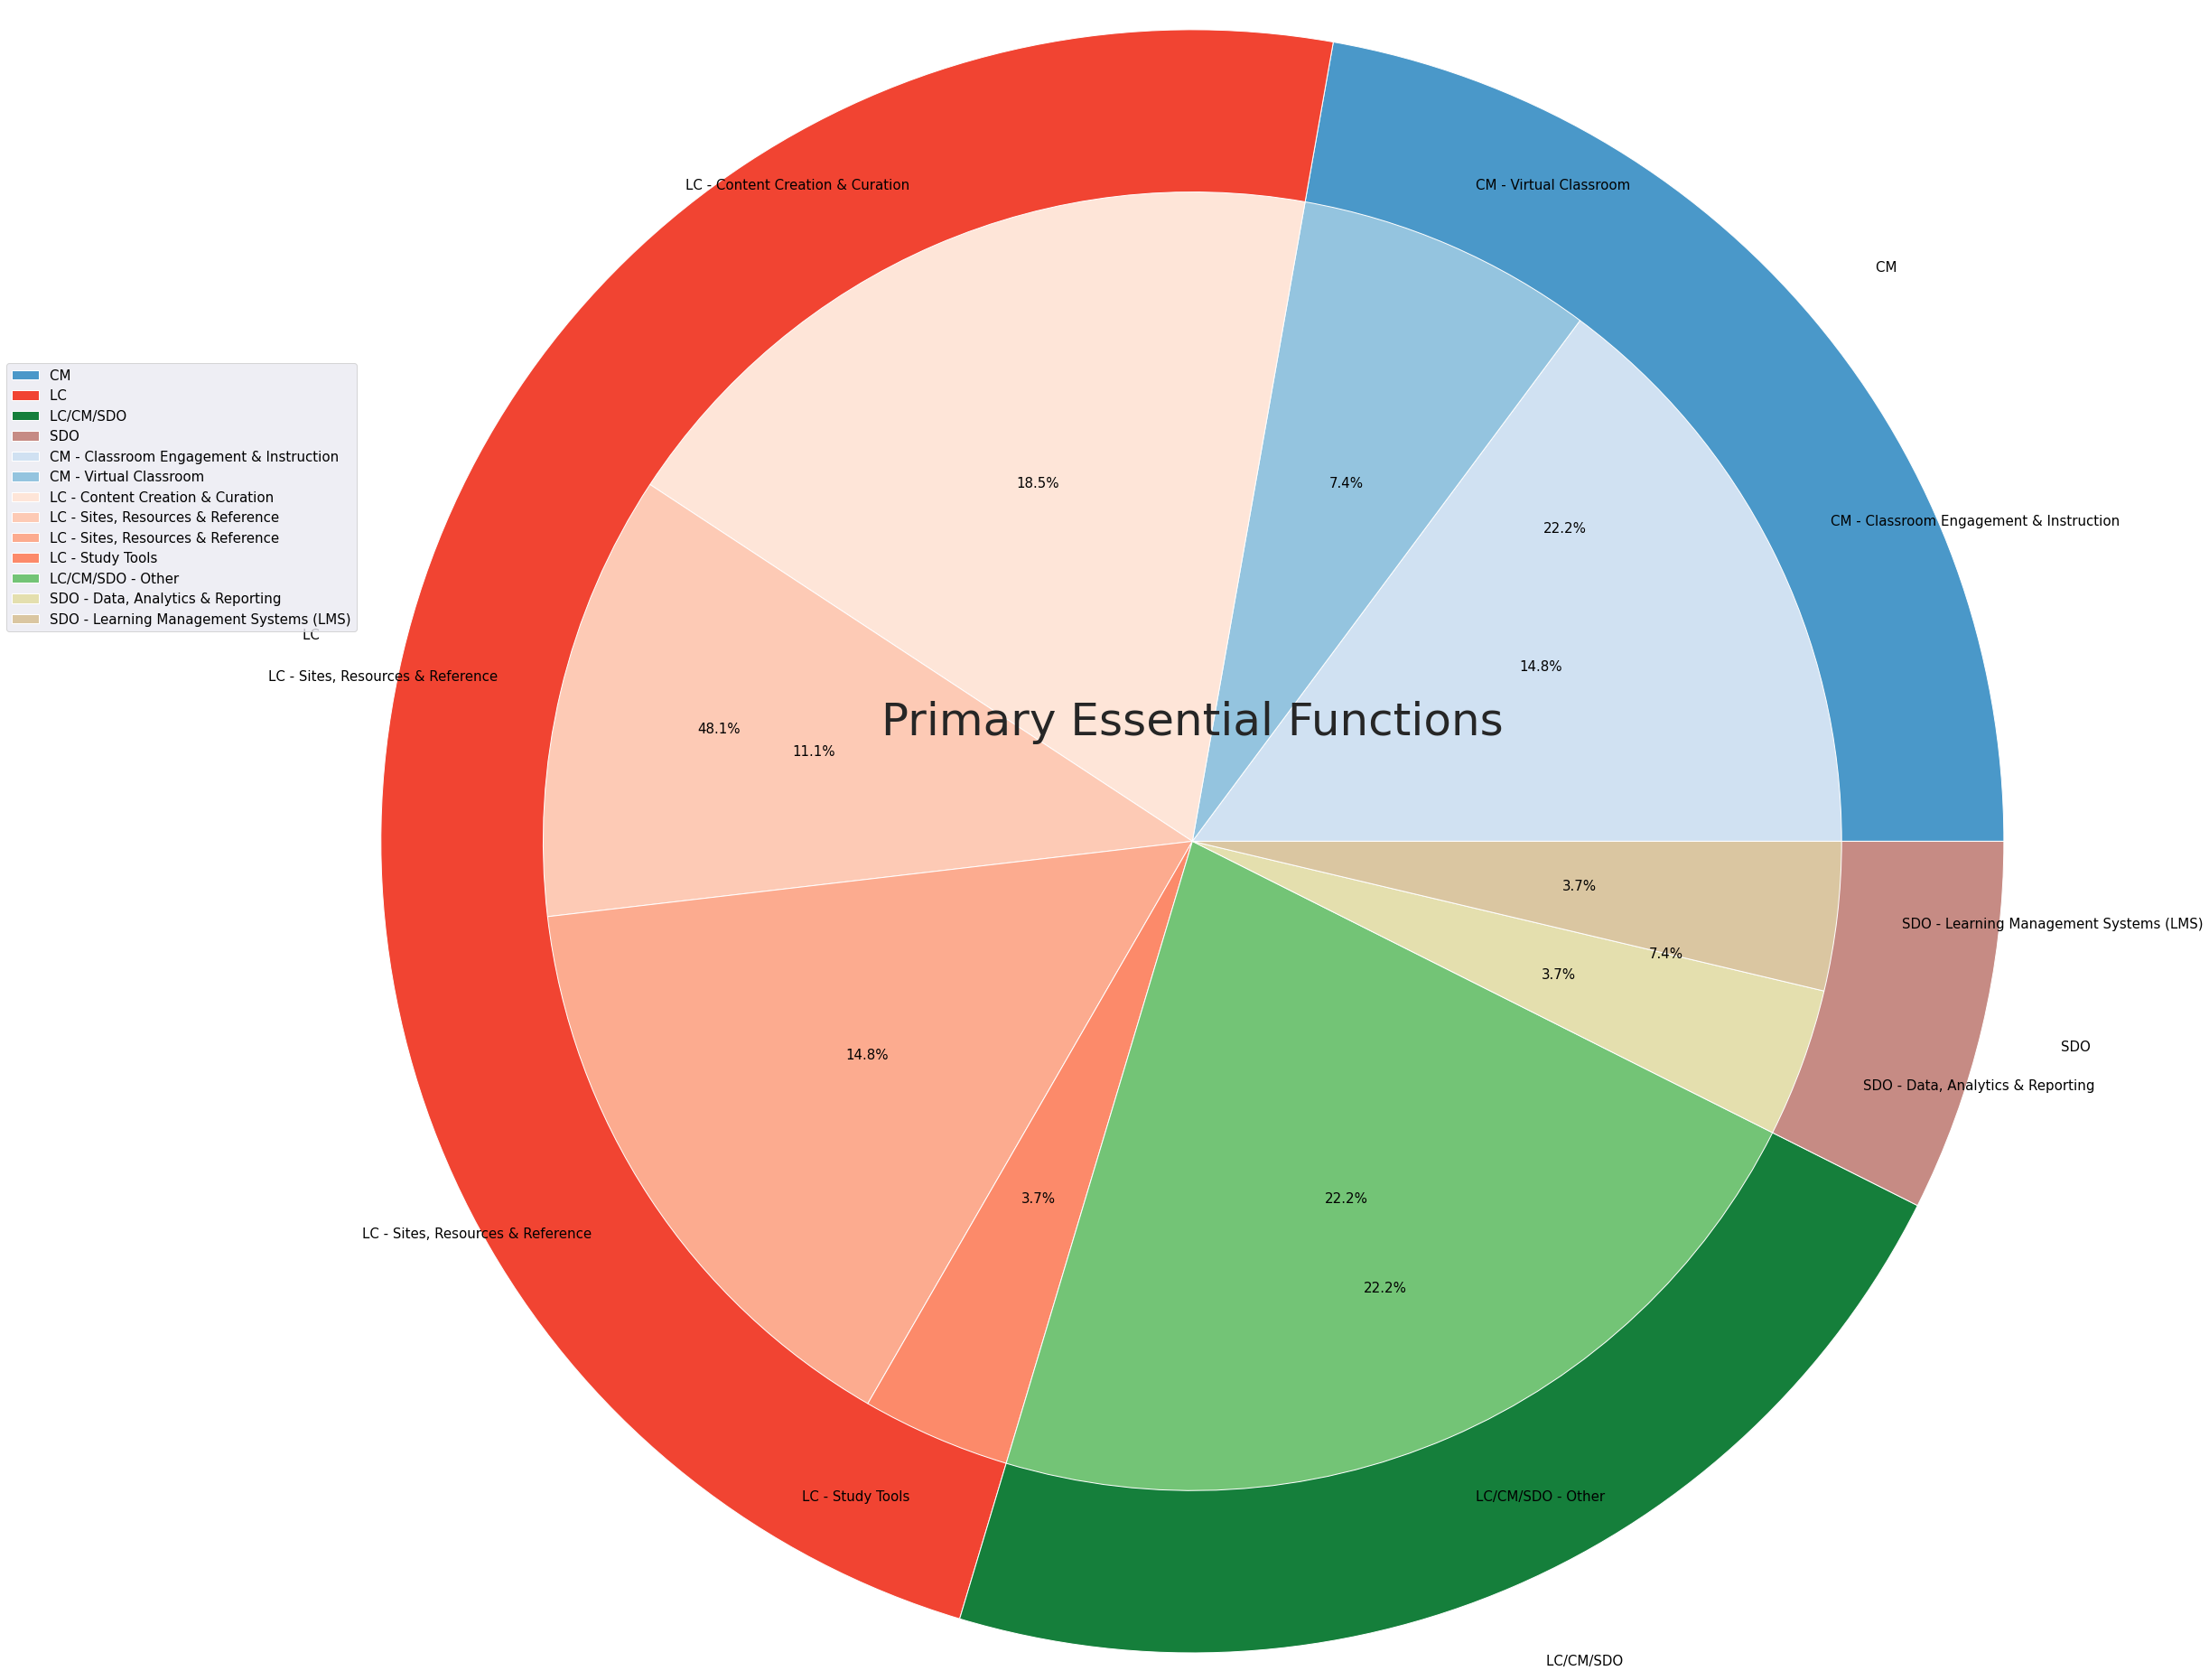

In [37]:
sns.set_style('darkgrid')
fig,ax = plt.subplots()
ax.axis('equal')

plt.rcParams.update({'text.color' : "black",
                     'axes.labelcolor' : "black"})
plt.rcParams.update({'font.size': 15})

cm, lc, other, sdo=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.pink_r]

ax.pie(gpef1['LP ID'],labels=gpef1.index,colors=[cm(0.6) , lc(0.6) , other(0.8) , sdo(0.6)],autopct='%1.1f%%', radius=10,explode=[0,0,0,0])
ax.pie(gpef2['LP ID'],labels=gpef2.index,colors=[cm(0.2),cm(0.4),lc(0.1),lc(0.2),lc(0.3),lc(0.4),other(0.5),sdo(0.3),sdo(0.4)], autopct='%1.1f%%', radius=8)
                  
plt.title("Primary Essential Functions",fontdict={'fontsize':50})
ax.legend(loc='lower right',bbox_to_anchor=(-2,1.5))
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)

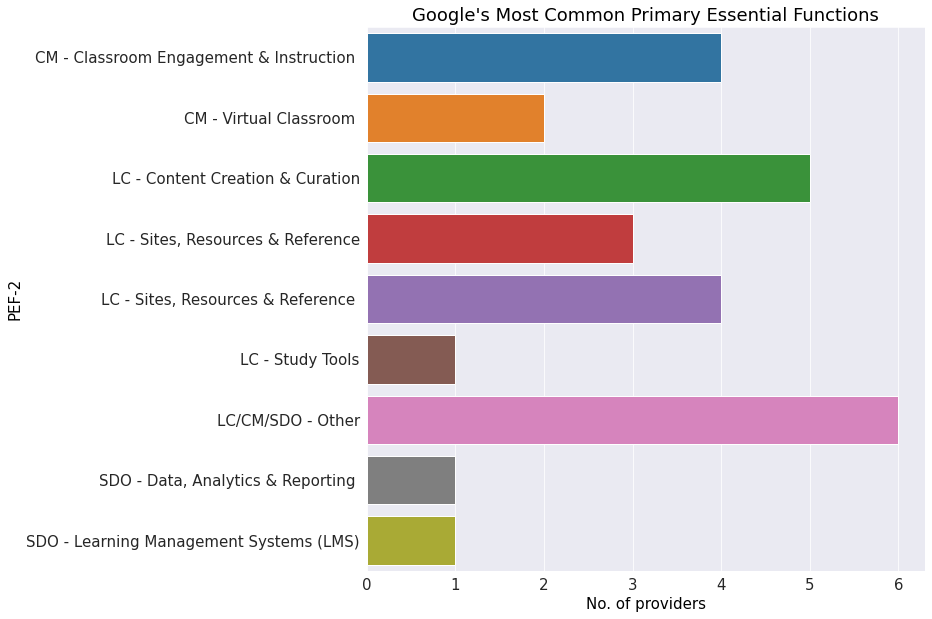

In [38]:
plt.figure(figsize=(10,10))
plt.title("Google's Most Common Primary Essential Functions")
plt.ylabel('Primary Essential Functions')
plt.xlabel('No. of providers')
sns.barplot(x=list(gpef2['LP ID']),y=gpef2.index)

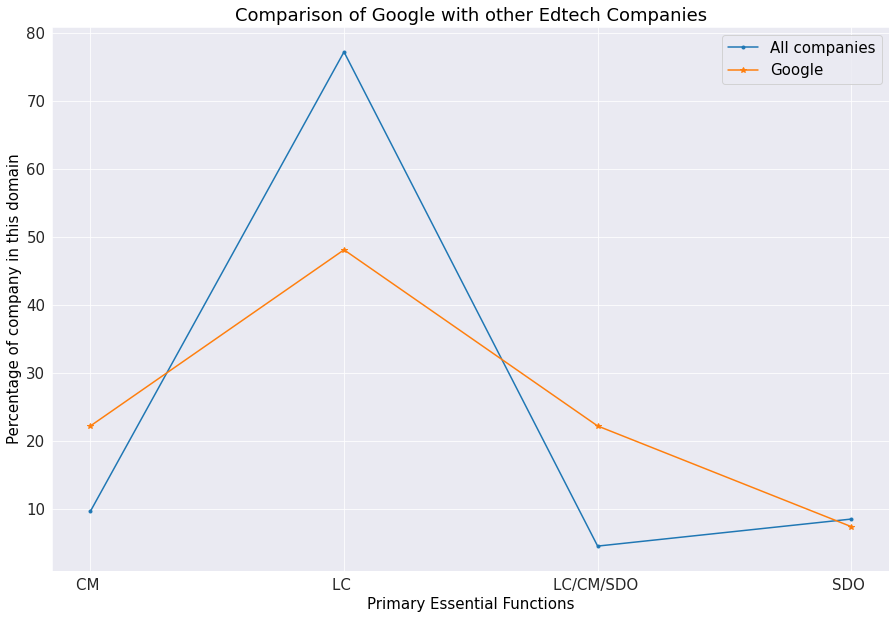

In [39]:
plt.figure(figsize=(15,10))
pef1['G percent'] = gpef1['percent']
plt.plot(pef1["percent"],label='All companies',marker='.')
plt.plot(gpef1["percent"],label='Google',marker='*')
plt.title("Comparison of Google with other Edtech Companies")
plt.xlabel('Primary Essential Functions')
plt.ylabel('Percentage of company in this domain')
plt.legend()

**Strategy of Google is different from the rest of the companies in this domain. As we can see in the plot above.**

Here we finish the analysis of our first dataset.

**Findings:**
Each sector had a fair share of products in it's domain , with 48.3 percent primarily focusing on PreK_12.
It seems likely that every product built it's way up the ladder, i.e. it was built for PreK-12 ,then used for Higher Education and then for corporate.
There is only one product each that focuses just on Higher Education and Corporates.
The pie chart makes it clear that mostly all products(77.3%) focused on learning and curriculum building.
The subsections can be easily observed in the pie chart above.
An interesting finding was that even though other companies had no more than 5 products in this domain yet , Google took a giant leap and managed to launch 27 different products.
On further interrogation of the dataset, another interesting thing was observed, although Google still has majority (48.1%) of it's product focusing on learning, the company showed big divergence from the general trend in the other two domains.
22.2 percent of Google products focused on Classroom Management , compared to 9.7% in general.
6 out of 34 products in the Classroom Management domain are from Google
Let us explore the other two datasets and finally explore if we can combine the findings of all 3 datasets.

**DISTRICT INFORMATION DATA** 
Understanding the data
The district file districts_info.csv includes information about the characteristics of school districts, including data from NCES (2018-19), FCC (Dec 2018), and Edunomics Lab. In this data set, we removed the identifiable information about the school districts. We also used an open source tool ARX (Prasser et al. 2020) to transform several data fields and reduce the risks of re-identification. For data generalization purposes some data points are released with a range where the actual value falls under. Additionally, there are many missing data marked as 'NaN' indicating that the data was suppressed to maximize anonymization of the dataset.

district_id : The unique identifier of the school district

state : The state where the district resides in

locale : NCES locale classification that categorizes U.S. territory into four types of areas: City, Suburban, Town, and Rural. See Locale Boundaries User's Manual for more information.

pct_black/hispanic : Percentage of students in the districts identified as Black or Hispanic based on 2018-19 NCES data

pct_free/reduced : Percentage of students in the districts eligible for free or reduced-price lunch based on 2018-19 NCES data

countyconnectionsratio : ratio (residential fixed high-speed connections over 200 kbps in at least one direction/households) based on the county level data from FCC From 477 (December 2018 version). See FCC data for more information.

pptotalraw : Per-pupil total expenditure (sum of local and federal expenditure) from Edunomics Lab's National Education Resource Database on Schools (NERD$) project. The expenditure data are school-by-school, and we use the median value to represent the expenditure of a given school district.

In [40]:
district_df = pd.read_csv('/content/districts_info.csv')

In [41]:
district_df.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
district_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


In [43]:
district_df.shape

(233, 7)

In [45]:
(district_df['pp_total_raw'][0])

'[14000, 16000['

In [46]:
district_df.locale.unique()

array(['Suburb', nan, 'Rural', 'City', 'Town'], dtype=object)

(-0.5, 1439.5, 1079.5, -0.5)

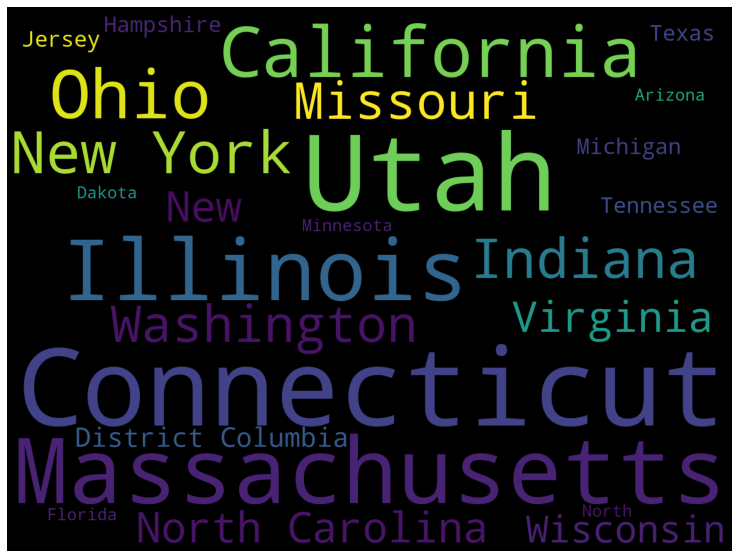

In [47]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(district_df['state'].dropna().astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

In [48]:
states = district_df.groupby(by ='state').count()[['district_id']]

Since we need the state shortforms like AZ for arizona, we need to make some changes in the dataset.

**We need to use additional Data**

In [49]:
#abbreviations of all the US States
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District Of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [50]:
codes = []
for i in states.index:
    codes.append(us_state_abbrev[i])
print(codes)

['AZ', 'CA', 'CT', 'DC', 'FL', 'IL', 'IN', 'MA', 'MI', 'MN', 'MO', 'NH', 'NJ', 'NY', 'NC', 'ND', 'OH', 'TN', 'TX', 'UT', 'VA', 'WA', 'WI']


In [51]:
data = dict(
        type = 'choropleth',
        colorscale = 'portland',
        locations = codes,
        locationmode = 'USA-states',
        z = list(states['district_id']),
        text = states.index,
        colorbar = {'title':'States'},
      )
layout = dict(title = 'States',
              geo = dict(projection = {'type':'mercator'})
             )
layout = dict(title= 'States with most districts mentioned',
              geo = {'scope':'usa'})

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

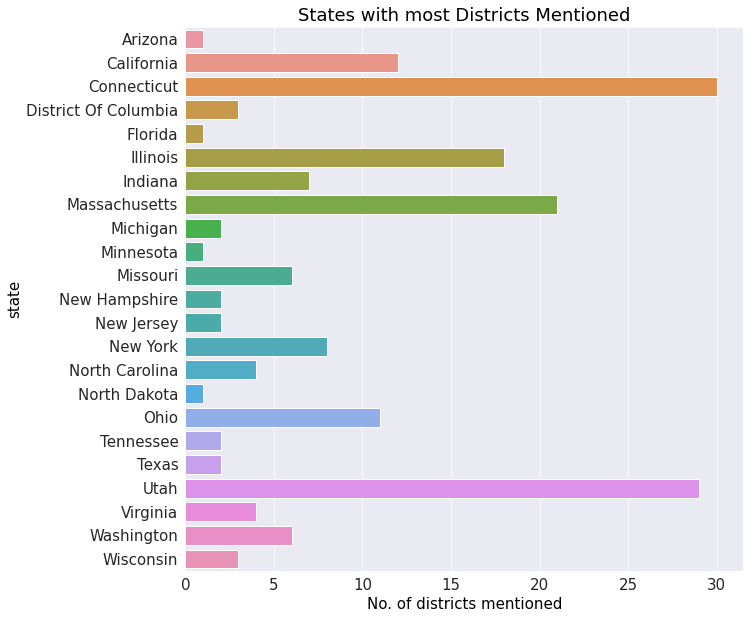

In [52]:
plt.figure(figsize=(10,10))
plt.title("States with most Districts Mentioned")
plt.ylabel('States')
plt.xlabel('No. of districts mentioned')
sns.barplot(x=list(states['district_id']),y=states.index)

***Cleaning the data***

We know that the district dataset is filled with a lot of null values. Let's try to visualize it.

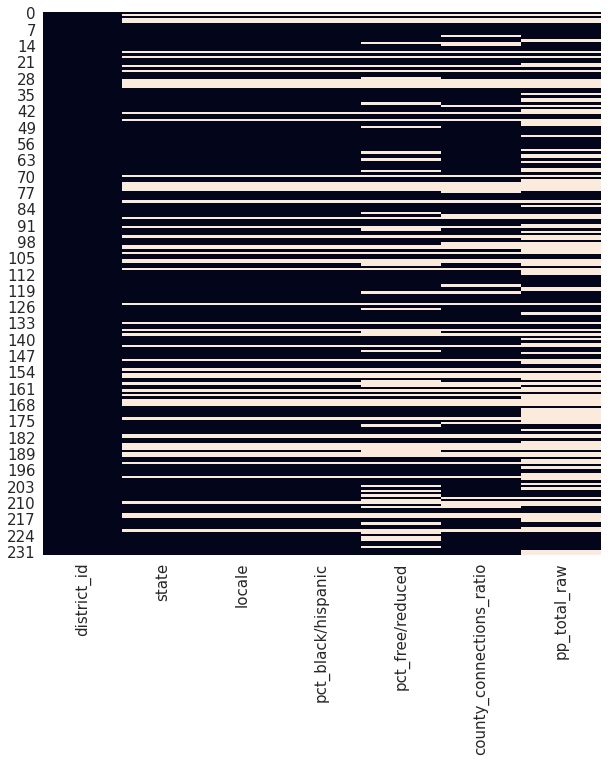

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(district_df.isna(),cbar=False)

It is clear that there a lot of data points that are just empty , with no information what so ever. It would be best if we first drop those data points.

In [54]:
district_df.dropna(subset=['state'],inplace=True)
district_df.sample(5)

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
147,1052,Illinois,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[0.18, 1[","[16000, 18000["
20,2779,Illinois,Rural,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[10000, 12000["
60,4949,Massachusetts,Suburb,"[0, 0.2[",NaN,"[0.18, 1[","[16000, 18000["
112,5150,Ohio,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[",NaN
99,2991,Ohio,Suburb,"[0, 0.2[","[0, 0.2[",NaN,NaN


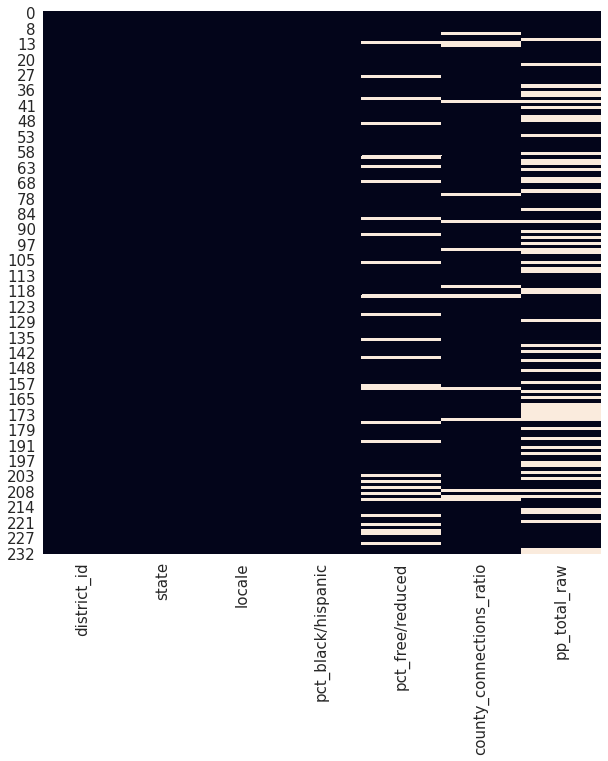

In [55]:
plt.figure(figsize=(10,10))
sns.heatmap(district_df.isna(),cbar=False,)

# **Trying to visualize the locale mentioned**

In [56]:
locale = district_df.groupby('locale').count()['district_id']
list(locale)

[29, 33, 104, 10]

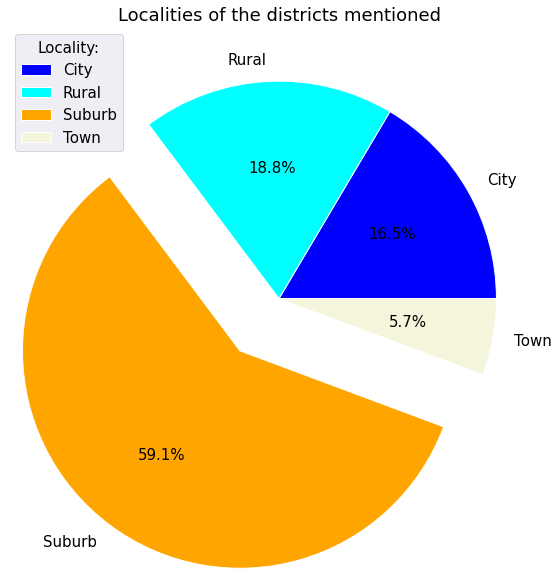

In [57]:
plt.figure(figsize=(10,10))

plt.pie(locale,labels=locale.index,explode=[0,0,0.3,0],colors = ("blue","cyan","orange","beige","green"),autopct='%1.1f%%')
         
plt.title("Localities of the districts mentioned")
plt.legend(title="Locality:")

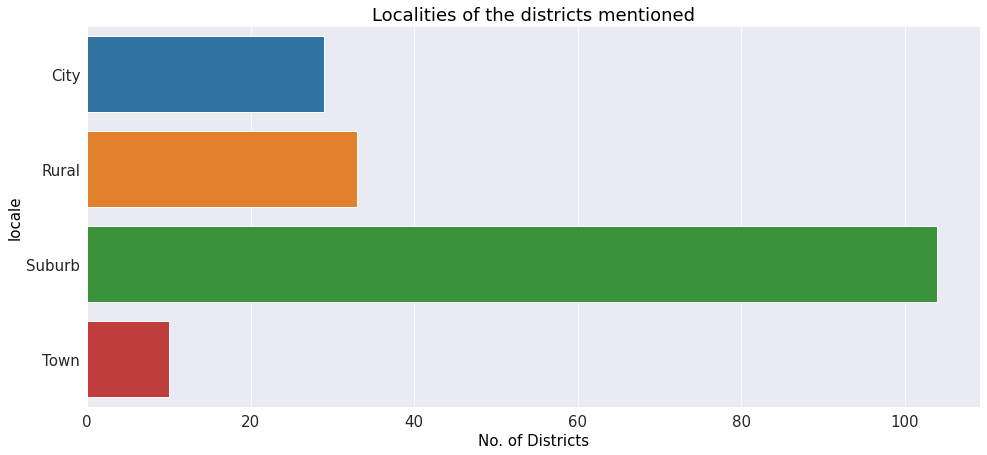

In [58]:
plt.figure(figsize=(16,7))
plt.title("Localities of the districts mentioned")
plt.ylabel('Sector(s)')
plt.xlabel('No. of Districts')
sns.barplot(x=list(locale),y=locale.index)

It can clearly be observed that most districts are Subarban.

In [59]:
district_df['state'].nunique()

23

It is my observation that GDP per capita would have a correlation with the engagement in Engagement Dataset, hence I will add it by state to district_df and then use it later on

In [60]:
gdp = pd.read_csv('/content/1000.csv.zip')[1:]
gdp.head()

,time,lp_id,pct_access,engagement_index
1,2020-01-01,17941.0,0.03,0.90
2,2020-01-01,65358.0,0.03,1.20
3,2020-01-01,98265.0,0.57,37.79
4,2020-01-01,59257.0,0.00,NaN
5,2020-01-01,90153.0,0.06,3.90


**Let's plot the Gdp per capita values on the map of USA**

In [61]:
us_state_abbrev

{'Alabama': 'AL',
 'Alaska': 'AK',
 'American Samoa': 'AS',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District Of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Guam': 'GU',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Northern Mariana Islands': 'MP',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Puerto Rico': 'PR',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 '

In [65]:
len(us_state_abbrev),gdp.shape

(56, (104002, 4))

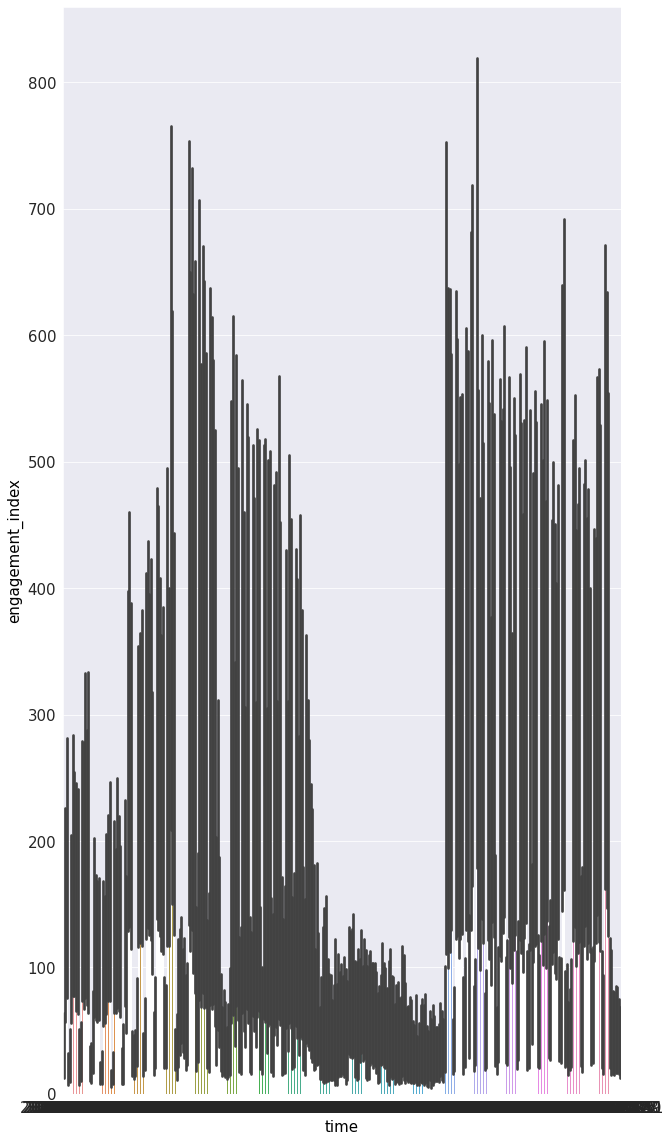

In [72]:
plt.figure(figsize=(10,20))
sns.barplot(x=gdp['time'],y=gdp.engagement_index)